#  <h1 style="text-align:center;">Assignment - 7</h1>

1. Write a program to implement arithmetic calculations using MPI processes.
2. Write a program with different processes to apply following functions to an image in parallel.
• Read an image.
• Convert above RGB image to grayscale.
• Find edges in the image.
• Show the original image

In [2]:
import mpi4py
from mpi4py import MPI
import numpy as np

In [ ]:
comm = MPI.COMM_WORLD # get the communicator object
rank = comm.Get_rank() # get the rank of the current process
name = MPI.Get_processor_name() # get the name of the current processor
size = comm.Get_size() # get the number of processes

In [4]:
randNum = np.zeros(1)

In [5]:
a = 10
b = 5

In [ ]:
if rank == 0:
print('rank = ', rank, ',' ,a+b)
if rank == 1:
print('rank = ', rank, ',' ,a*b)
if rank == 2:
print('rank = ', rank, ',' ,a/b)
if rank == 3:
print('rank = ', rank, ',' ,a-b)

In [7]:
!mpiexec -n 4 python hpc-arith.py

rank =  0 , addition :  15
rank =  3 , subtraction :  5
rank =  2 , division :  2.0
rank =  1 , multiplication : 50


In [8]:
import cv2

In [9]:
def read_image(filename):
    image = cv2.imread(filename)
    return image
def convert_to_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image
def find_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges
def show_image(image, title="Image"):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [13]:
filename = "01.jpg"
image = read_image(filename)

In [14]:
if rank == 0:
    print('rank =', rank, ',', 'Read the image')
elif rank == 1:
    grayscale_image = convert_to_grayscale(image)
    print('rank =', rank, ',', 'Converted RGB image to grayscale')
elif rank == 2:
    edges_image = find_edges(image)
    print('rank =', rank, ',', 'Found edges in the image')
elif rank == 3:
    show_image(image, title="Original Image")
    print('rank =', rank, ',', 'Displayed the original image')
    grayscale_image = convert_to_grayscale(image)
    show_image(grayscale_image, title="Grayscale Image")
    print('rank =', rank, ',', 'Displayed the grayscale image')
    edges_image = find_edges(image)
    show_image(edges_image, title="Edges Image")
    print('rank =', rank, ',', 'Displayed the edges image')


rank = 0 , Read the image


In [19]:
!mpiexec -n 4 python hpc-7(2).py

rank = 2 , Found edges in the image
rank = 0 , Read the image
rank = 1 , Converted RGB image to grayscale
rank = 3 , Displayed the original image
rank = 3 , Displayed the grayscale image
rank = 3 , Displayed the edges image


In [17]:
import matplotlib.pyplot as plt

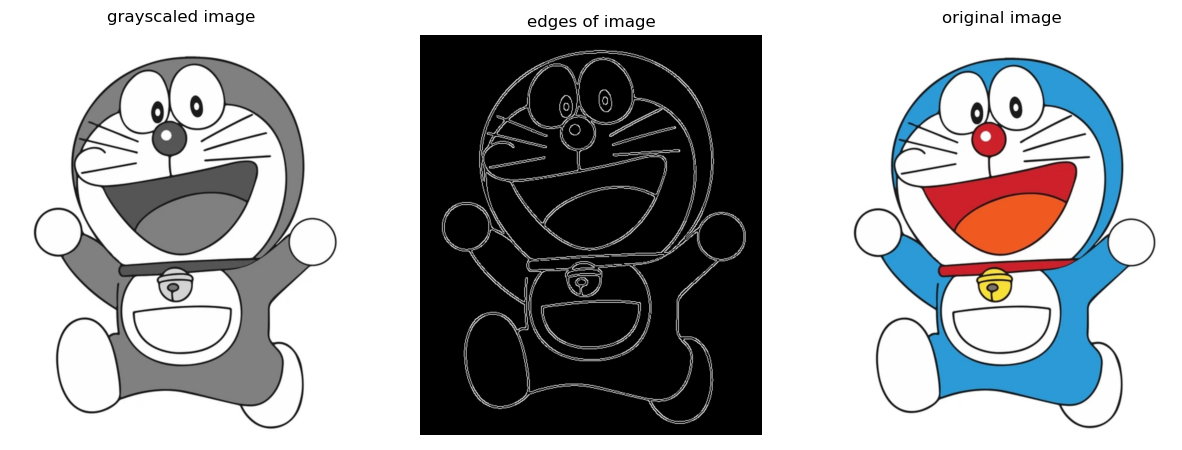

In [20]:
# Load the images
image1 = cv2.imread("hpc-7-2-1.png")
image2 = cv2.imread("hpc-7-2-2.png")
image3 = cv2.imread("hpc-7-2-3.png")

# Convert BGR to RGB (Matplotlib uses RGB)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.axis('off')
plt.title('grayscaled image')
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.axis('off')
plt.title('edges of image')
plt.subplot(1, 3, 3)
plt.imshow(image3_rgb)
plt.axis('off')
plt.title('original image')
plt.show()